# Реализация различных алгоритмов обхода вершин графа

## Графы

 __Граф__ — это абстрактное представление множества объектов и связей между ними.
 
 Графом называют пару $(V, E)$ где $V$ это множество вершин, а $E$ множество пар, каждая из которых представляет собой связь (эти пары называют рёбрами).
 

Граф может быть ориентированным или неориентированным. В ориентированном графе, связи являются направленными (то есть пары в $E$ являются упорядоченными, например пары $(a, b)$ и $(b, a)$ это две разные связи). В свою очередь в неориентированном графе, связи ненаправленные, и поэтому если существует связь $(a, b)$ то значит что существует связь $(b, a)$. 

### Способы представления графов 

2. __Матрицы смежности__ (удобный способ представления __плотных (неразреженных)__ графов); ![matrix](http://kvodo.ru/wp-content/uploads/matrix_smeghnost.jpg)

1. __Списки смежности__ и в виде матрицы смежности (удобный способ представления __разреженных__ графов). 

|<img src="https://koenig-media.raywenderlich.com/uploads/2017/01/graph4.png" width="400"> | <img src="https://koenig-media.raywenderlich.com/uploads/2017/01/graph5.png" width="400">  |
|:---:|:---:|
| Неориентированный граф | Список смежности неориентированного графа|

_Оба способа подходят для представления ориентированных и неориентированных графов._

#### Реализация графа, задаваемого списком смежности 

In [1]:
from collections import defaultdict

class Graph:
    """
    Graph class represents a directed graph using adjacency list representation
    """
    def __init__(self):
        self.graph = defaultdict(list)
        self.verticies = 0
        
    def length(self):
        return self.verticies
    
    def getEdges(self, u):
        return self.graph[u]
 
    def addEdge(self, u, v):
        self.verticies = max(self.verticies, u + 1, v + 1)
        self.graph[u].append(v)

Построим какой-нибудь очень простой граф, например граф с первого рисунка.

In [2]:
simple_graph = Graph()
simple_graph.addEdge(1, 2)
simple_graph.addEdge(1, 4)
simple_graph.addEdge(4, 1)
simple_graph.addEdge(2, 4)
simple_graph.addEdge(4, 3)
simple_graph.addEdge(2, 3)
simple_graph.addEdge(3, 2)

In [3]:
simple_graph.graph[3]

[2]

#### Рисовалка 

Ниже функция рисования графа. Не обязательно, но симпатично. 

In [4]:
from visualizer import draw_graph
%matplotlib inline

Нарисуем построенный нами ранее граф

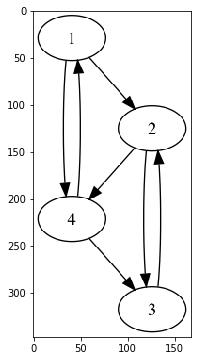

In [5]:
draw_graph(simple_graph, file_name='simple_graph')

##  Обход графа в ширину (BFS)

__Обход в ширину__ (Поиск в ширину, англ. BFS, Breadth-first search) — один из простейших алгоритмов обхода графа, являющийся основой для многих важных алгоритмов для работы с графами.


### Описание алгоритма
Поиск в ширину работает путём последовательного просмотра отдельных уровней графа, начиная с узла-источника $u$.

Рассмотрим все рёбра $(u,v)$, выходящие из узла $u$. Добавить узел $v$ в очередь. После того, как будут проверены все рёбра, выходящие из узла $u$, из очереди извлекается следующий узел $u$, и процесс повторяется.

__или__

1. Поместить узел, с которого начинается поиск, в изначально пустую очередь.
2. Извлечь из начала очереди узел $u$ и пометить его как развёрнутый.
3. В конец очереди добавляются все преемники узла $u$, которые ещё не развёрнуты и не находятся в очереди.
4. Если очередь пуста, то все узлы связного графа были просмотрены; завершить обход.
5. Вернуться к п. 2.

_Примечание: деление вершин на развёрнутые и не развёрнутые необходимо для произвольного графа (так как в нём могут быть циклы). Для дерева эта операция не нужна, так как каждая вершина будет выбрана один-единственный раз._

#### Нерекурсивная (итеративная) реализация

In [6]:
def BFS(graph, start):
    visited = [False] * graph.length()
    queue = []
    
    !YOUR CODE HERE
    # add start vertex to queue, mark as visited

    assert (len(queue) == 1), 'Wrong size of the queue'
    print ("BFS order:", end=' ')
    while queue:
        test_size = len(queue)
        
        # get top element from the queue
        current = !YOUR CODE HERE
        
        print (current, end=' -> ')
        assert (len(queue) == test_size - 1), 'Wrong size of the queue'
        
        !YOUR CODE HERE
        # for each edge (current, u) check if u has been visited. If not add u to queue and mark as visited
        
    print('end')

In [7]:
BFS(simple_graph, 1)

/bin/sh: YOUR: command not found


AssertionError: Wrong size of the queue

Нарисуем еще один граф.

In [ ]:
tree = Graph()
tree.addEdge(1, 2)
tree.addEdge(1, 3)
tree.addEdge(3, 7)
tree.addEdge(3, 8)
tree.addEdge(2, 4)
tree.addEdge(2, 5)
tree.addEdge(5, 6)
tree.addEdge(8, 9)

draw_graph(tree, file_name='tree')

In [ ]:
print (tree.graph[8])

In [ ]:
BFS(tree, 1)

### Применение

Алгоритм __BFS__ позволяет найти кратчайший (содержащий наименьшее число ребер) путь из одной вершины графа до всех остальных вершин. Чаще всего применяется при поиске кратчайшего пути от одной вешины до другой. Пример ->

<img src="https://cdn-images-1.medium.com/max/1600/1*GChPGXvZQiVwjok9EvKPIA.gif" width="650"> 

При такой постановке задачи, алгоритм требует некоторой доработки, а именно:

1. выход из алгоритма при достижении целевой вершины,
2. сохранение построенного пути.

In [ ]:
def BFS(graph, start, goal=None):
    visited = [False] * graph.length()
    parents = [None] * graph.length()
    queue = []
    
    !YOUR CODE HERE
    # copy your BFS code and add goal check and parent memorization
    
    path = build_path(goal, parents)
    return path
    
def build_path(parents, goal):
    path = [goal]
    parent = parents[goal]
    while parent is not None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

In [ ]:
path = BFS(tree, 1, 9)
print('The shortest path from 1 to 9 is:', ('-').join(map(str, path)))

##  Обход графа в глубину (DFS)

__Поиск в глубину__ (англ. Depth-first search, DFS) — один из методов обхода графа. Стратегия поиска в глубину, как и следует из названия, состоит в том, чтобы идти «вглубь» графа, насколько это возможно. 


### Описание алгоритма
Алгоритм поиска описывается рекурсивно: перебираем все исходящие из рассматриваемой вершины рёбра. Если ребро ведёт в вершину, которая не была рассмотрена ранее, то запускаем алгоритм от этой нерассмотренной вершины, а после возвращаемся и продолжаем перебирать рёбра. Возврат происходит в том случае, если в рассматриваемой вершине не осталось рёбер, которые ведут в нерассмотренную вершину. Если после завершения алгоритма не все вершины были рассмотрены, то необходимо запустить алгоритм от одной из нерассмотренных вершин.

__или__

Пусть задан граф $G = (V, E)$, где $V$ — множество вершин графа, $E$ — множество ребер графа. Предположим, что в начальный момент времени все вершины графа окрашены в белый цвет. Выполним следующие действия:

1. Пройдём по всем вершинам $v\in V$. 
    * Если вершина $v$ белая, выполним для неё $DFS(v)$.

Процедура $DFS$ (параметр — вершина $u\in V$)

1. Перекрашиваем вершину $u$ в серый цвет. 
2. Для всякой вершины $w$, смежной с вершиной $u$ и окрашенной в белый цвет, рекурсивно выполняем процедуру $DFS(w)$.
3. Перекрашиваем вершину $u$ в чёрный цвет.

_Часто используют двухцветные метки — без серого, на 1-м шаге красят сразу в чёрный цвет._

#### Pекурсивная реализация

In [ ]:
def DFS(graph, start, visited=None):
    if visited is None: # if this is the start vertex
        visited = set()
        print ("DFS order:", end=' ')
        
    !YOUR CODE HERE
    # add start to visited 
    
    print (start, end=' -> ')
    
    !YOUR CODE HERE
    # for each edge (start, u) check if u has been visited. If not call DFS(u)

In [ ]:
DFS(tree, 1)

In [ ]:
draw_graph(tree, file_name='graph')

### Применение

Из названия этого метода обхода графа ясно, что в процессе поиска мы идем «вглубь» графа настолько, насколько возможно. Следуя алгоритму, мы последовательно обойдем все вершины графа, которые доступны из начальной вершины. Если ребро ведет в не пройдённую до этого момента вершину, то алгоритм запускается с нее. В случае если ребер, которые ведут в не рассмотренную вершину, больше нет, то происходит возврат назад. Пример ->

<img src="https://cdn-images-1.medium.com/max/1600/1*yBXw4Q8rSMRqGYC-iZI0yg.gif" width="650"> 

Исходя из особенностей алгорима чаще всего DFS применяется в таких задачах, как поиск в графе компонент связности, циклов и др.

### BFS vs. DFS
![](https://hamzic.files.wordpress.com/2016/12/fig1.gif?w=630)

## \[ИСТОЧНИКИ\]
1. https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/
2. https://koenig-media.raywenderlich.com
3. https://medium.com/omarelgabrys-blog/path-finding-algorithms-f65a8902eb40
4. https://neerc.ifmo.ru/wiki/index.php?title=Обход_в_ширину
5. https://ru.wikipedia.org/wiki/Поиск_в_глубину